In [1]:
import numpy as np
from matplotlib import pyplot as plt

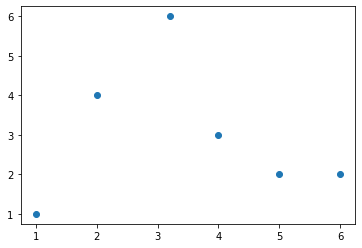

In [2]:
data = np.array([
    [1, 1],
    [2, 4],
    [3.2, 6],
    [4, 3],
    [5, 2],
    [6, 2],
])
x, y = data.T
plt.scatter(x,y)
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [4]:
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

In [5]:
test = np.linspace(0,7,50)[:, np.newaxis]

In [6]:
K = [1,2,3,6]

In [7]:
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [8]:
pred = []
for k in K:
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train)
    prediction = model.predict(test)
    pred.append(prediction)

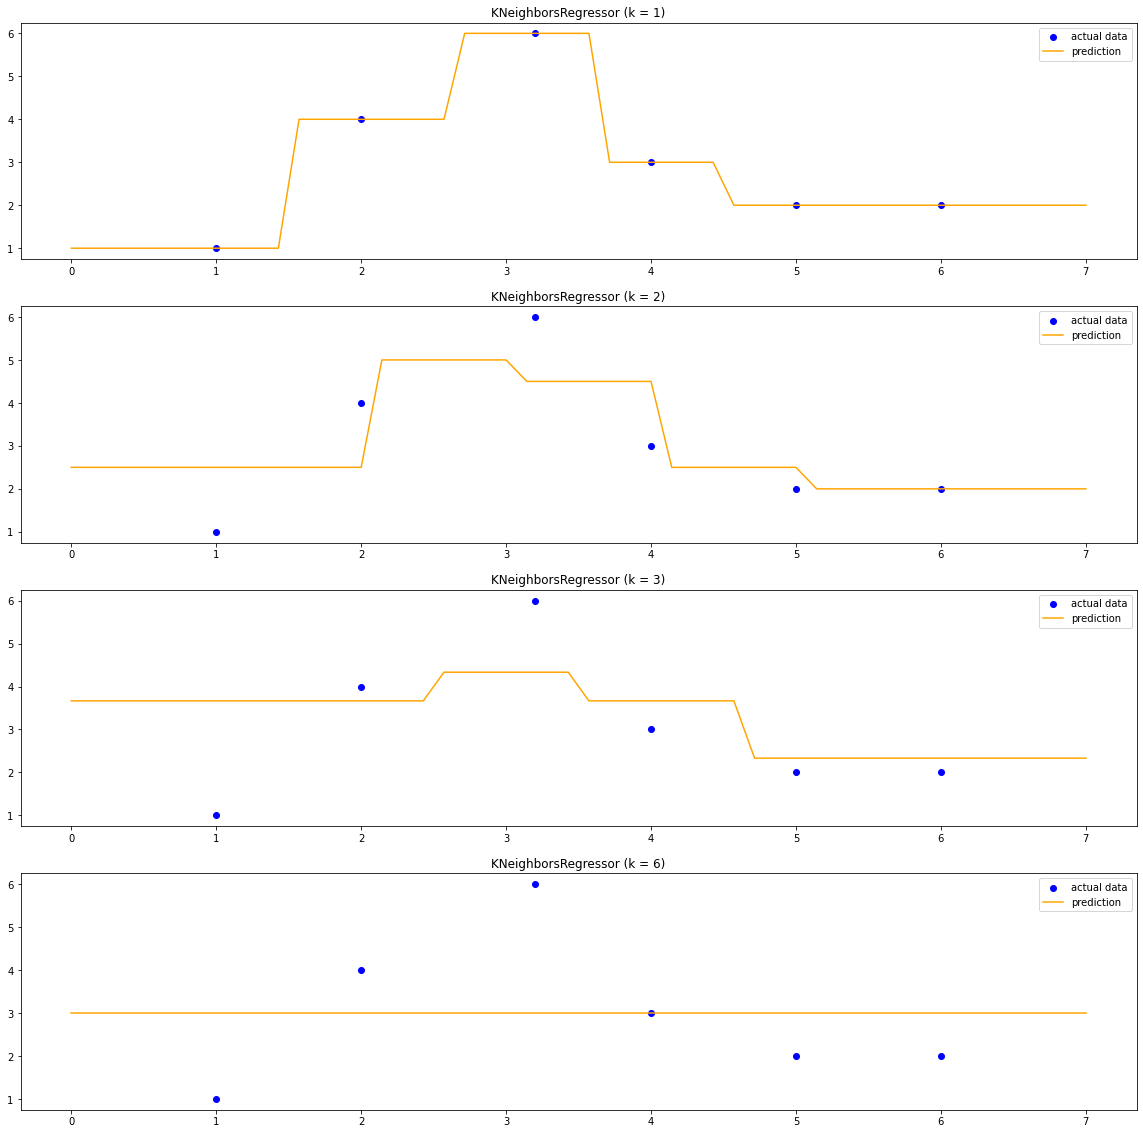

In [10]:
plt.figure(figsize=(20,20))
for i in range(len(pred)): 
    plt.subplot(4, 1, i + 1)
    plt.scatter(x, y, color="blue", label="actual data")
    plt.plot(test, pred[i], color="orange", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i)" % (K[i]))

#### Check RMSE to compare different K value

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
pred2 = []
for k in K:
    model2 = neighbors.KNeighborsRegressor(n_neighbors = k)
    model2.fit(x_train, y_train)
    prediction2 = model2.predict(x_train)
    pred2.append(prediction2)
    error = sqrt(mean_squared_error(y_train,prediction2))
    rmse_val.append(error)

[0.0, 1.241638702145945, 1.3333333333333333, 1.632993161855452]


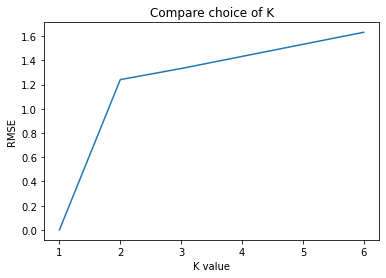

In [37]:
plt.plot(K,rmse_val)
plt.title("Compare choice of K")
plt.xlabel("K value")
plt.ylabel("RMSE")
plt.show()

Answer to the question 5:

**K is not larger and always better.** We can see this case, when k=6 which is the biggest, but its prediction is not the best. Its prediction is all 3 which is not make sense even though it has lowest RMSE, but it does not mean k=6 is the best. On the contrary, **k=2** should be the best k because it has relatively low RMSE as we can see directly from above plot. 

For all x < 1, we can see from the above plots, **there is not too much difference between the prediction y** which means all of response value when x<1 are very close to each other. 